In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
response = requests.get("https://www.billboard.com/charts/year-end/2022/top-rap-artists/")
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")
soup.prettify()

artists = []

for artist in soup.find_all("div", class_="o-chart-results-list-row-container"):
    artist = artist.find("h3", class_="c-title")
    artists.append(artist.text.strip())


In [5]:
artists = [artist.replace(" ", "-") for artist in artists]

artists

['Drake',
 'Lil-Baby',
 'Future',
 'Kendrick-Lamar',
 'Juice-WRLD',
 'Jack-Harlow',
 'Lil-Durk',
 'Gunna',
 'Kodak-Black',
 'Rod-Wave',
 'YoungBoy-Never-Broke-Again',
 'Latto',
 'Post-Malone',
 'Kanye-West',
 'Doja-Cat',
 'Nardo-Wick',
 'Polo-G',
 'Eminem',
 'Nicki-Minaj',
 'Pop-Smoke',
 'The-Kid-LAROI',
 'Megan-Thee-Stallion',
 'Moneybagg-Yo',
 'DJ-Khaled',
 'Lil-Nas-X']

In [6]:
headers = {'User-Agent':
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [7]:
rappers = []
sampled = []
songs = []

for artist in artists:
        for i in range(41):

            response = requests.get(f"https://www.whosampled.com/{artist}/samples/?sp={i}", headers= headers)

            soup = BeautifulSoup(response.content, "html.parser")

            

            for samples in soup.find_all("article", class_="trackItem"):
                x = samples.text.strip()
                x= x.split("\n")

                while "" in x:
                    x.remove("")
                
                for i in x:
                    if i.startswith("by"):
                        x.remove(i)
                    elif i.startswith("sampled"):
                        x.remove(i)
                
                for i in x:
                    if i.startswith("see"):
                        x.remove(i)

                    

                for i in range(1, len(x)):
                    rappers.append(artist)
                    songs.append(x[0])
                    sampled.append(x[i])


In [8]:
songs = [song.split("(")[0].strip() for song in songs]
songs1 = [song.replace(" ", "-").replace("/", "").replace("--", "-").replace("|", "-") for song in songs]
songs1

['Hotline-Bling',
 'Champagne-Poetry',
 'Champagne-Poetry',
 'Pound-CakeParis-Morton-Music-2',
 'Pound-CakeParis-Morton-Music-2',
 'Pound-CakeParis-Morton-Music-2',
 'Passionfruit',
 'Nice-for-What',
 'Nice-for-What',
 'Nice-for-What',
 'Rich-Flex',
 'Rich-Flex',
 'Rich-Flex',
 'Rich-Flex',
 '0-to-100-the-Catch-Up',
 '0-to-100-the-Catch-Up',
 '0-to-100-the-Catch-Up',
 '0-to-100-the-Catch-Up',
 'Jimmy-Cooks',
 'Jimmy-Cooks',
 'SICKO-MODE',
 'SICKO-MODE',
 'SICKO-MODE',
 'Spin-Bout-U',
 'In-My-Feelings',
 'In-My-Feelings',
 'In-My-Feelings',
 'In-My-Feelings',
 'Jumpman',
 'Poetic-Justice',
 'Work',
 'Middle-of-the-Ocean',
 'Middle-of-the-Ocean',
 'WAIT-FOR-U',
 'Truffle-Butter',
 'Started-From-the-Bottom',
 'Started-From-the-Bottom',
 "Fuckin'-Problems",
 "Fuckin'-Problems",
 "Fuckin'-Problems",
 'Lemon-Pepper-Freestyle',
 'Take-Care',
 'Take-Care',
 'No-Guidance',
 'One-Dance',
 'Fair-Trade',
 'Knife-Talk',
 'Jungle',
 'Jungle',
 'Privileged-Rappers',
 'Know-Yourself',
 'Know-Yourself'

In [9]:
df = pd.DataFrame()
df["Artists"] = rappers
df["Songs"] = songs
df["Sampled"] = sampled
df

,Artists,Songs,Sampled
0,Drake,Hotline Bling,Why Can't We Live Together
1,Drake,Champagne Poetry,Navajo
2,Drake,Champagne Poetry,Until I Found the Lord (My Soul Couldn't Rest)
3,Drake,Pound Cake/Paris Morton Music 2,Don't Say a Word
4,Drake,Pound Cake/Paris Morton Music 2,Jimmy Smith Rap
...,...,...,...
3293,Lil-Nas-X,In THEY FEELINGS,Oh Honey
3294,Lil-Nas-X,Grab That!,Freek 'N You
3295,Lil-Nas-X,Grab That!,Biggidy Bounce It
3296,Lil-Nas-X,Nasarati,Rings


In [12]:
#copy df to df_x
df_x = df.copy()

#drop songs col
df_x.drop(columns = "Songs", inplace = True)

df_count = df.groupby(['Artists', 'Sampled']).size().reset_index(name='Count')

#drop all rows with count less than 5
df_count = df_count[df_count.Count > 2]
print(df_count.shape)
df_count

#get number of unique artists and sampled
print(df_count.Artists.nunique())
print(df_count.Sampled.nunique())

(44, 3)
10
40


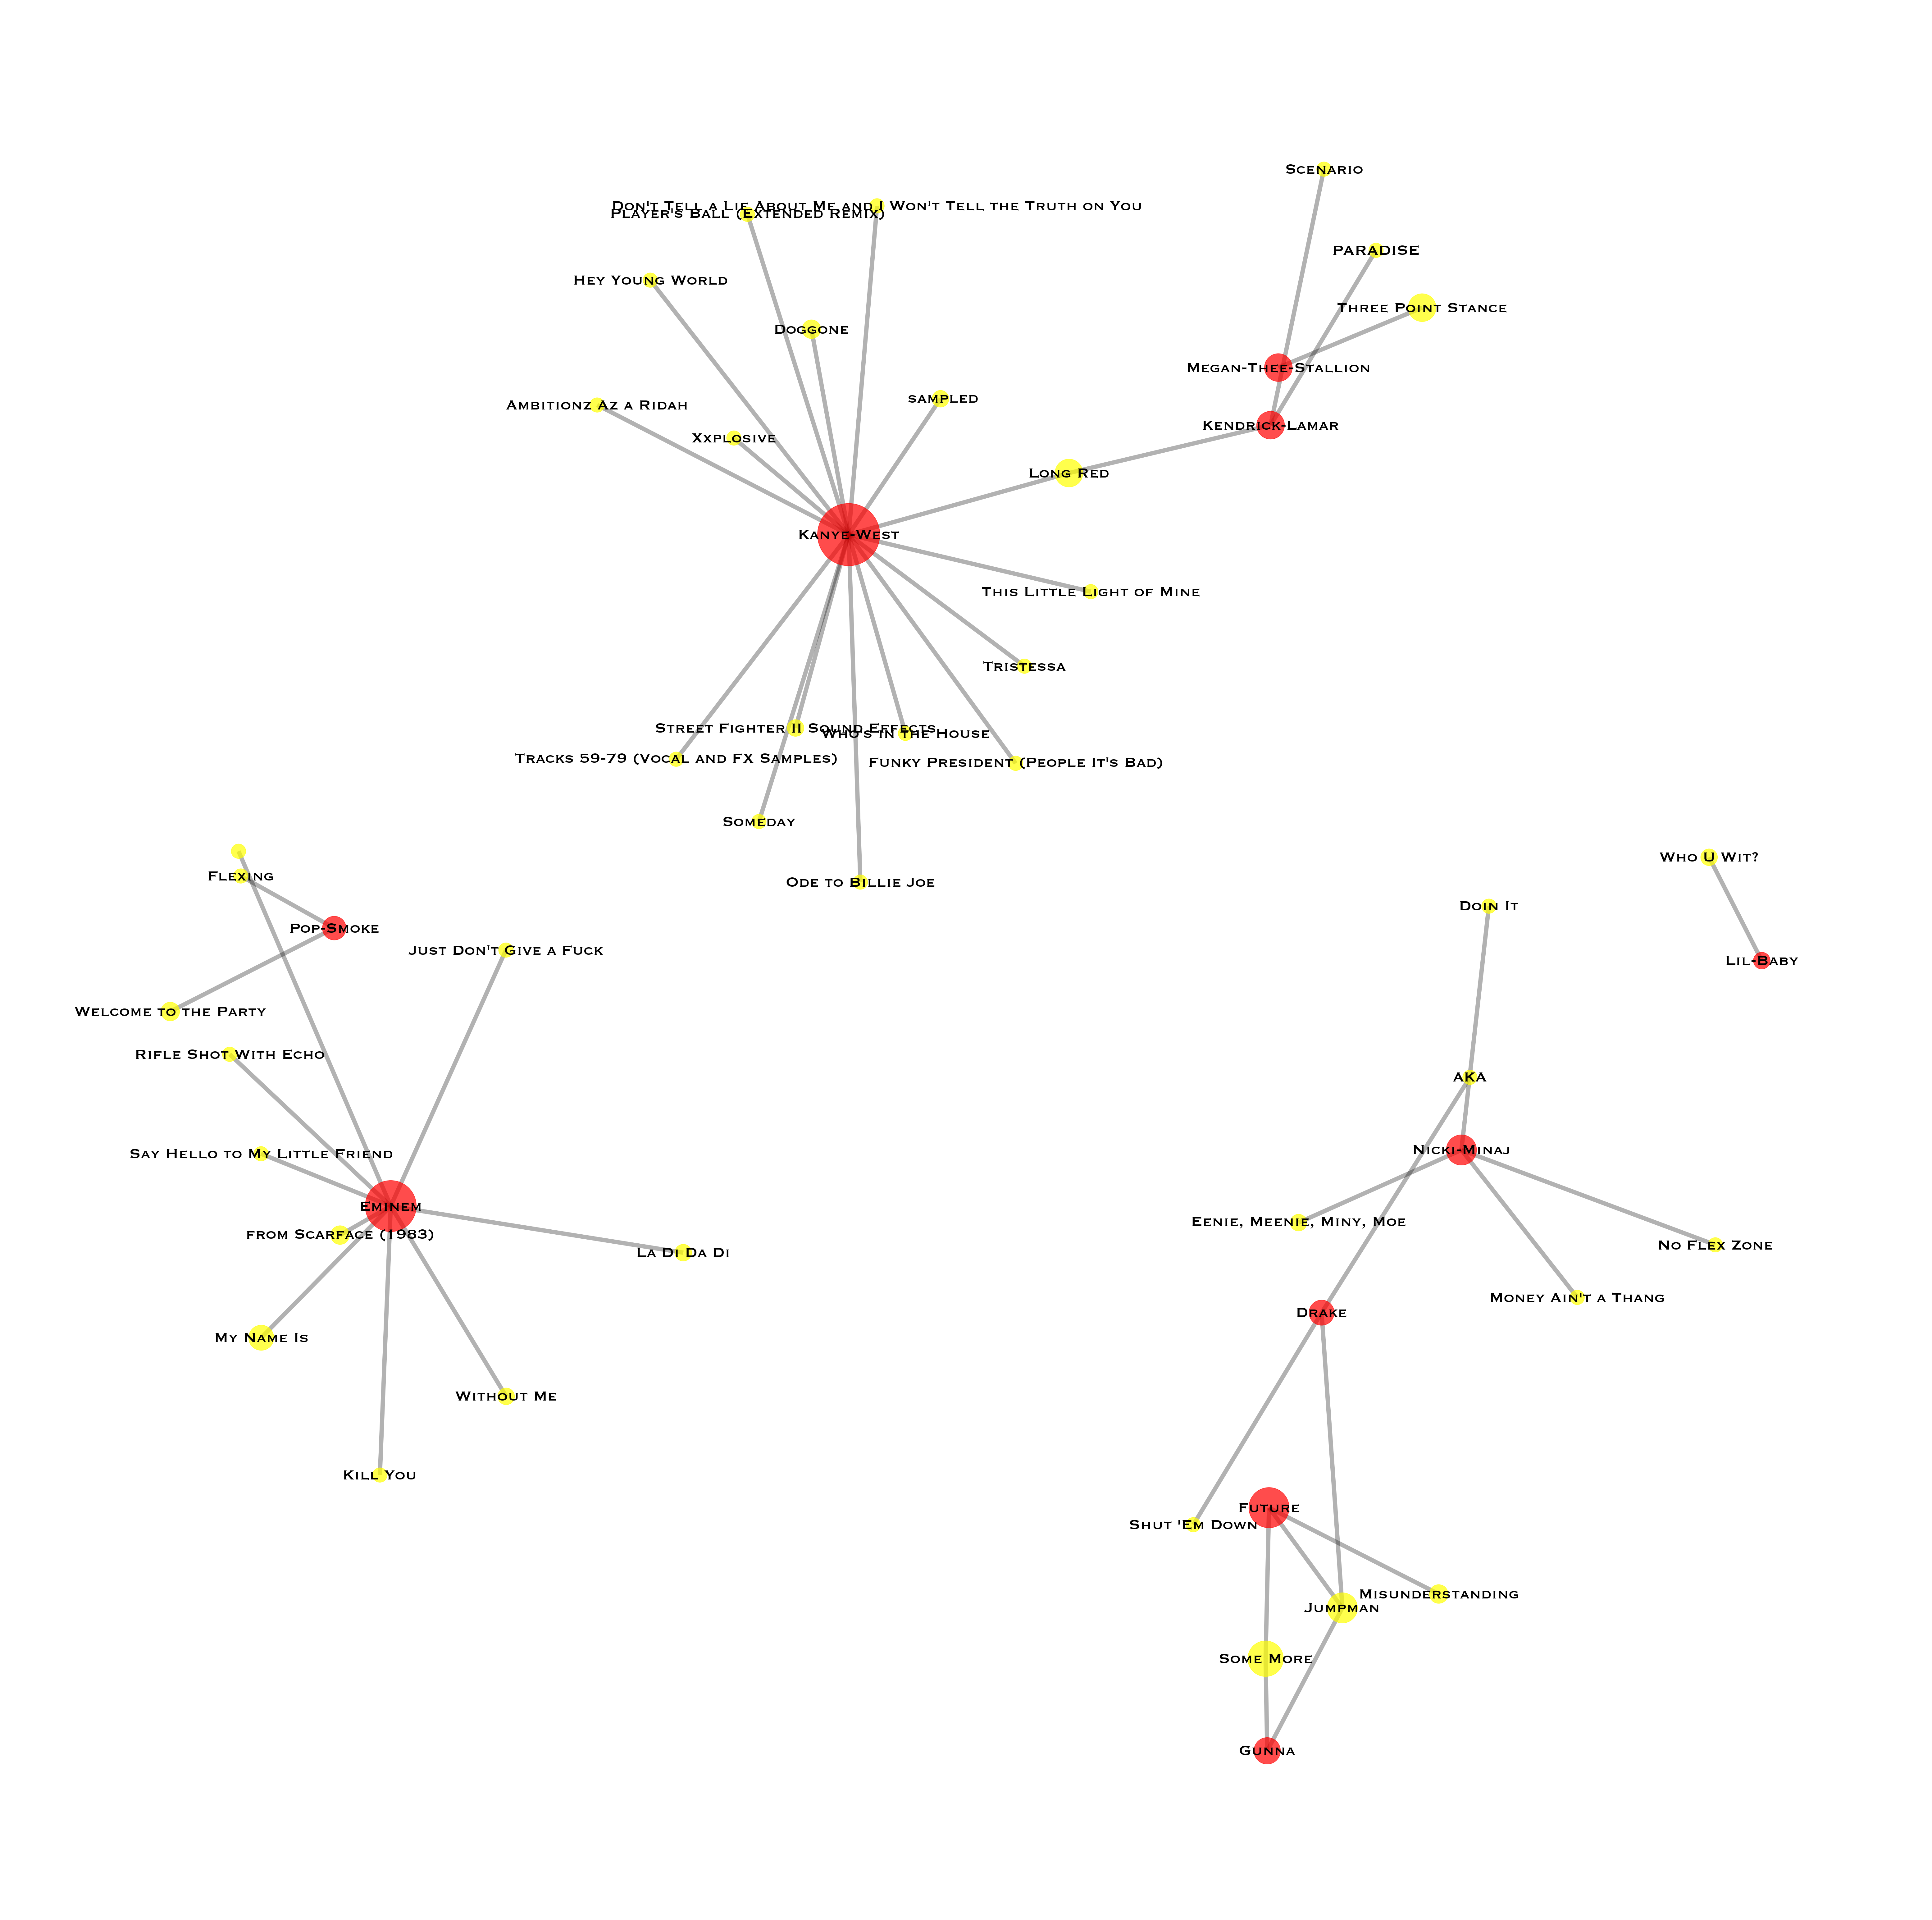

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# create a new empty graph
G = nx.Graph()

node_sizes_mp = {}
node_colours_mp = {}

# add nodes and edges to the graph
for index, row in df_count.iterrows():
    artist = row['Artists']
    sample = row['Sampled']
    count = row['Count']
    
    # add artist node if it doesn't exist
    if not G.has_node(artist):
        G.add_node(artist)
        node_sizes_mp[artist] = 0
        node_colours_mp[artist] = 'red'
    node_sizes_mp[artist] += count * 380
    
    # add sample node if it doesn't exist
    if not G.has_node(sample):
        G.add_node(sample)
        node_sizes_mp[sample] = 0
        node_colours_mp[sample] = 'yellow'
    node_sizes_mp[sample] += count * 380
    
    # add edge between artist and sample
    G.add_edge(artist, sample, weight=count)
    
# set node sizes based on the count column
# node_sizes = [G.edges[(u, v)]['weight']*50 for u, v in G.edges if 'weight' in G.edges[(u, v)]]
node_sizes = []
node_colours = []
for node in G.nodes:
    node_sizes.append(node_sizes_mp[node])
    node_colours.append(node_colours_mp[node])



#chnage the size of the graph
plt.figure(figsize=(80, 80))
#change the background color
plt.rcParams['axes.facecolor'] = 'grey'
# draw the graph
pos = nx.spring_layout(G, k=0.62)
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes, node_size=node_sizes, alpha=0.7, node_color=node_colours)
nx.draw_networkx_edges(G, pos, width=10, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=40, font_family='Copperplate', font_color='black')
plt.axis('off')
plt.show()


In [11]:
#groupby sampled and count the number of times it appears
df = df.groupby("Sampled").count().sort_values(by="Artists", ascending=False)
df


,Artists,Songs
Sampled,,
Some More,26,26
Jumpman,19,19
Long Red,13,13
AKA,13,13
Three Point Stance,12,12
...,...,...
I Can't Do Without You,1,1
I Can't Argue With U.....,1,1
I <3 U So,1,1


In [14]:
df1 = pd.DataFrame()
df1["Artists"] = rappers
df1["Songs"] = songs1
df1
#remove duplicate songs
df1 = df1.drop_duplicates(subset=['Songs'])
print(df1[0:20])
"""search_result = df1[df1['Songs'].str.contains('SICKO-MODE')]
print(search_result)"""


   Artists                           Songs
0    Drake                   Hotline-Bling
1    Drake                Champagne-Poetry
3    Drake  Pound-CakeParis-Morton-Music-2
6    Drake                    Passionfruit
7    Drake                   Nice-for-What
10   Drake                       Rich-Flex
14   Drake           0-to-100-the-Catch-Up
18   Drake                     Jimmy-Cooks
20   Drake                      SICKO-MODE
23   Drake                     Spin-Bout-U
24   Drake                  In-My-Feelings
28   Drake                         Jumpman
29   Drake                  Poetic-Justice
30   Drake                            Work
31   Drake             Middle-of-the-Ocean
33   Drake                      WAIT-FOR-U
34   Drake                  Truffle-Butter
35   Drake         Started-From-the-Bottom
37   Drake                Fuckin'-Problems
40   Drake          Lemon-Pepper-Freestyle


"search_result = df1[df1['Songs'].str.contains('SICKO-MODE')]\nprint(search_result)"

In [16]:
producers = []
artists_producers = []
song_producers = []
i = 0
for row, record in df1.iterrows():
    temp = []
    try:
        response = requests.get(f"https://www.whosampled.com/{record[0]}/{record[1]}/", headers= headers)
        soup = BeautifulSoup(response.content, "html.parser")
        for song in soup.find_all("div", class_="track-metainfo"):
            for producer in song.find_all("a"):
                producers.append(producer.text.strip())
                artists_producers.append(record[0])
                song_producers.append(record[1])
        
    except:
        producers.append("None")
        artists_producers.append("None")
        song_producers.append("None")
    i+=1

print(producers)
print(artists_producers)
print(song_producers)

['nineteen85', 'Noah "40" Shebib', 'Masego', 'Maneesh', 'Oliver El-Khatib', 'Boi-1da', 'Jordan Evans', 'Nana Rogues', 'Murda Beatz', 'BlaqNmilD', 'Vinylz', 'Tay Keith', 'FNZ', 'BoogzDaBeast', 'Vinylz', 'Boi-1da', 'nineteen85', 'Vinylz', 'Tay Keith', 'Cubeatz', 'Banbwoi', 'Noah "40" Shebib', 'BlaqNmilD', 'TrapMoneyBenny', 'Noah "40" Shebib', 'Metro Boomin', 'OZ', 'Noel Cadastre', 'Sucuki', 'Nik D', 'Loof', 'Mike Zombie', 'Noah "40" Shebib', 'Boi-1da', 'Austin Powerz', 'FNZ', 'Jamie xx', 'Noah "40" Shebib', 'nineteen85', 'Noah "40" Shebib', 'WizKid', 'OZ', 'Jahaan Sweet', 'Patron (Producer)', 'Travis Scott', 'WondaGurl', 'Metro Boomin', 'Peter Lee Johnson', 'Noah "40" Shebib', 'Earl on the Beat', 'Lil Yachty', 'Noah "40" Shebib', 'GENT (Producer)', 'Boi-1da', 'Vinylz', 'Syk Sense', 'Hagler', 'Noel Cadastre', 'Boi-1da', 'Noah "40" Shebib', 'Kid Masterpiece', 'Harley Arsenault', 'Noah "40" Shebib', 'Alex Lustig', 'Noel Cadastre', 'PARTYNEXTDOOR', 'Swizz Beatz', 'Noah "40" Shebib', 'Supah M

In [17]:
df_example = pd.DataFrame()
df_example["Artists"] = artists_producers
df_example["Songs"] = song_producers
df_example["Producers"] = producers

df_example

,Artists,Songs,Producers
0,Drake,Hotline-Bling,nineteen85
1,Drake,Champagne-Poetry,"Noah ""40"" Shebib"
2,Drake,Champagne-Poetry,Masego
3,Drake,Champagne-Poetry,Maneesh
4,Drake,Champagne-Poetry,Oliver El-Khatib
...,...,...,...
1778,Lil-Nas-X,DEAD-RIGHT-NOW,Tom Levesque
1779,Lil-Nas-X,DEAD-RIGHT-NOW,Jasper Harris
1780,Lil-Nas-X,Nasarati,Robb2B
1781,Lil-Nas-X,Nasarati,RAYAYY


In [19]:
#copy df to df_x
df_y = df_example.copy()

#drop songs col
df_y.drop(columns = "Songs", inplace = True)

df_y__count = df_y.groupby(['Artists', 'Producers']).size().reset_index(name='Count')

#drop all rows with count less than 5
df_y__count = df_y__count[df_y__count.Count > 3]
df_y__count


,Artists,Producers,Count
0,DJ-Khaled,808-Ray,4
4,DJ-Khaled,Cool & Dre,7
5,DJ-Khaled,DJ Khaled,27
18,DJ-Khaled,STREETRUNNER,12
19,DJ-Khaled,Tarik Azzouz,10
...,...,...,...
682,Nicki-Minaj,Pop Wansel,4
707,Pop-Smoke,808Melo,16
727,Pop-Smoke,Rico Beats,7
740,Post-Malone,Louis Bell,5


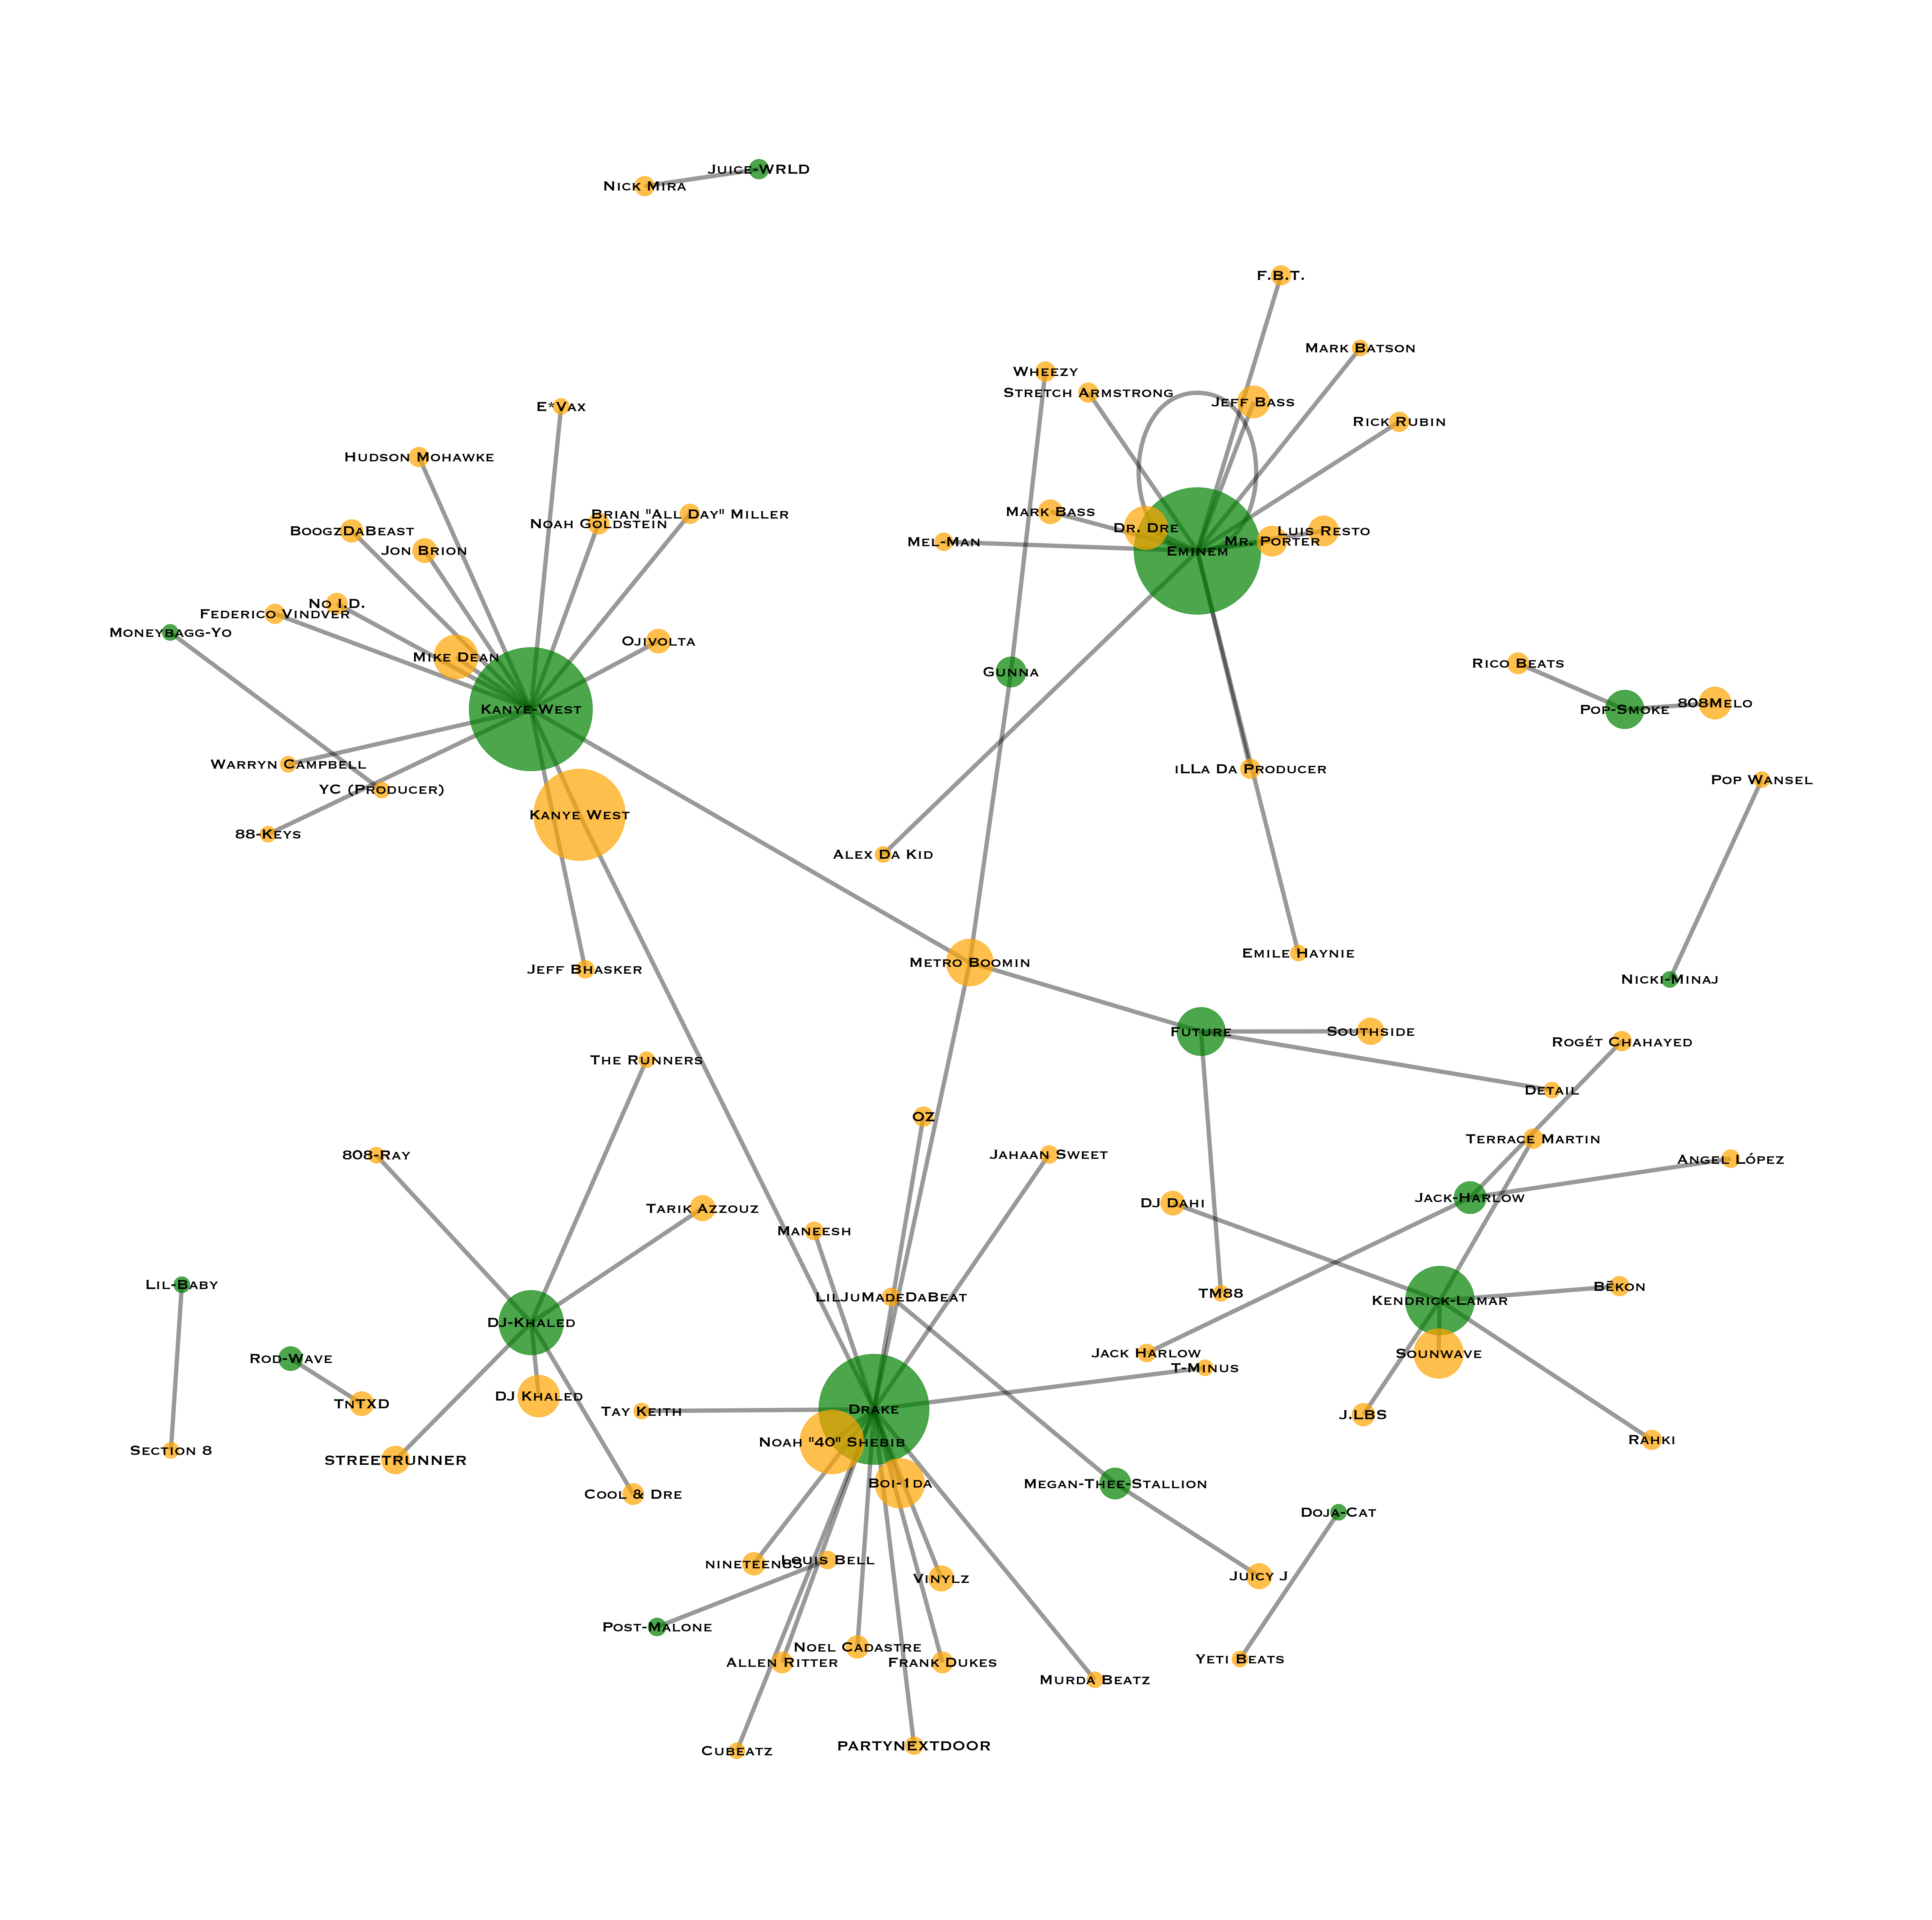

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# create a new empty graph
G = nx.Graph()

node_sizes_mp = {}
node_colours_mp = {}

# add nodes and edges to the graph
for index, row in df_y__count.iterrows():
    artist = row['Artists']
    sample = row['Producers']
    count = row['Count']
    
    # add artist node if it doesn't exist
    if not G.has_node(artist):
        G.add_node(artist)
        node_sizes_mp[artist] = 0
        node_colours_mp[artist] = 'green'
    node_sizes_mp[artist] += count * 350
    
    # add sample node if it doesn't exist
    if not G.has_node(sample):
        G.add_node(sample)
        node_sizes_mp[sample] = 0
        node_colours_mp[sample] = 'orange'
    node_sizes_mp[sample] += count * 350
    
    # add edge between artist and sample
    G.add_edge(artist, sample, weight=count)
    
# set node sizes based on the count column
# node_sizes = [G.edges[(u, v)]['weight']*50 for u, v in G.edges if 'weight' in G.edges[(u, v)]]
node_sizes = []
node_colours = []
for node in G.nodes:
    node_sizes.append(node_sizes_mp[node])
    node_colours.append(node_colours_mp[node])



#chnage the size of the graph
plt.figure(figsize=(80, 80))
#change the background color
plt.rcParams['axes.facecolor'] = 'grey'
# draw the graph
pos = nx.spring_layout(G, k=0.60)
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes, node_size=node_sizes, alpha=0.7, node_color=node_colours)
nx.draw_networkx_edges(G, pos, width=10, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=40, font_family='Copperplate', font_color='black')
plt.axis('off')
plt.show()


In [36]:
grouped_producers = df_example.groupby(['Artists', 'Songs'])['Producers'].agg(lambda x: ', '.join(set(x))).reset_index()


# Display the results
grouped_producers

,Artists,Songs,Producers
0,DJ-Khaled,Big-Boy-Talk,"808-Ray, Cool & Dre, DJ Khaled"
1,DJ-Khaled,Billy-Ocean,DJ Khaled
2,DJ-Khaled,Bitches-and-Bottles,"Mike WiLL Made It, Marz"
3,DJ-Khaled,Born-N-Raised,The Runners
4,DJ-Khaled,Bottles-&-Rockin-J's,Lex Luger
...,...,...,...
921,YoungBoy-Never-Broke-Again,Don't-Rate-Me,"Hitman Beatz, Cheese, Kacey Khaliel, Popnick"
922,YoungBoy-Never-Broke-Again,House-Arrest-Tingz,Drum Drummie
923,YoungBoy-Never-Broke-Again,I-Am-Who-They-Say-I-Am,DJ Suede the Remix God
924,YoungBoy-Never-Broke-Again,Pimpin-a-Bitch,"Vintage Rippah, Khris James"
